
Objective

    Understand the different factors that influence the income of an individual.
    To build a prediction model that can help the government formulate policies for the right pockets of the society.




Context

`DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. The NGO is working on improving the policies with respect to the income of the needful people so that workers can be paid according to the work and also introduce some programs to enhance the skills of the work which will eventually help in the overall development of the nation. The NGO has received the dataset by the government and needs to be analyzed thoroughly. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal with the government.`



Data Dictionary

The data contains characteristics of the people

    age: continuous - age of a Person
    workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
    education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: no. of years a person studied - continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship : Relationship of the person with the dependent member. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: Investment gain of the person other than salary - continuous
    capital-loss: Loss from investments - continuous
    hours-per-week: No. of hours a person works - continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
    salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)



In [ ]:
print("*"*100)

****************************************************************************************************


LIBRARY LOADING

In [ ]:
#Importing libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(42)
np.random.seed(42)
r_state = 42 #Random State argument.

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
print('*'*100)

****************************************************************************************************


DATA LOADING

In [ ]:
#Connecting to google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading in the dataframe.
df_who = pd.read_csv('/content/drive/MyDrive/Datasets/who_data.csv')
df = df_who.copy()       #Creating a copy to work on.
df_test = df_who.copy()  #Creating a copy to run tests on before applying to df if necessary.

In [ ]:
#First look at data.
df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print('*'*100)

****************************************************************************************************


DATA OVERVIEW

In [ ]:
#Understanding the overall shape of the dataset
df.shape

(32561, 15)

There are enough rows to have 15 columns (no multi-coliniarity issue).

In [ ]:
#Understanding data types for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [ ]:
#Understanding the numerical values in the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


IRREGULAR OBSERVATIONS:

'fnlwgt' is slighly left skewed with a max that is very far outreaching.

'education_no_of_years' max of 16 is possible but only if the count starts from the beginning of highschool and not the beginning of college.

'capital_gain' and 'capital_loss' columns seem to only apply to a select fiew individuals as for most those values are 0.

'working_hours_per_week' has a min value of 1 which is not likely as jobs that only employ people for 1 hour a week are rare if at all real.

In [ ]:
print('*'*100)

****************************************************************************************************


DATA PREPROCESSING AND ANALYSIS (EDA)

In [ ]:
#Creating a list of numeric variables and a list of object variables.

num_vars = df.select_dtypes(include=['number']).columns.tolist() #Numeric columns
obj_vars = df.select_dtypes(include=['object']).columns.tolist() #Object columns
df[obj_vars] = df[obj_vars].astype('category')  #Switching dtpyes to category for efficiency and compatibility.


print(f'Numeric columns: \n{num_vars}')
print()
print(f'Object columns: \n{obj_vars}')

Numeric columns: 
['age', 'fnlwgt', 'education_no_of_years', 'capital_gain', 'capital_loss', 'working_hours_per_week']

Object columns: 
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


In [ ]:
#Looking over value counts in object variables.

for i in obj_vars:
  count_summary = df[i].value_counts() #Count.
  percentage_summary = df[i].value_counts(normalize=True) #Percentage.
  total_summary = pd.concat([count_summary, percentage_summary], axis=1) #Dataframe with both counts.
  total_summary.columns = ['Counts', 'Percentage'] #Clarify the column names.

  # Apply red color to percentages less than 5% as potential outliers.
  total_summary['Percentage'] = total_summary['Percentage'].apply(
        lambda x: f'\033[91m{x:.2%}\033[0m' if x <= 0.05 else f'{x:.2%}')

  print(f'The counts for \033[1;34m{i.upper()}\033[0m are: ') # Make class (i) more visible.
  print(total_summary)
  print('*'*50)

The counts for WORKCLASS are: 
                   Counts      Percentage
 Private            22696          69.70%
 Self-emp-not-inc    2541           7.80%
 Local-gov           2093           6.43%
 ?                   1836           5.64%
 State-gov           1298  3.99%
 Self-emp-inc        1116  3.43%
 Federal-gov          960  2.95%
 Without-pay           14  0.04%
 Never-worked           7  0.02%
**************************************************
The counts for EDUCATION are: 
               Counts      Percentage
 HS-grad        10501          32.25%
 Some-college    7291          22.39%
 Bachelors       5355          16.45%
 Masters         1723           5.29%
 Assoc-voc       1382  4.24%
 11th            1175  3.61%
 Assoc-acdm      1067  3.28%
 10th             933  2.87%
 7th-8th          646  1.98%
 Prof-school      576  1.77%
 9th              514  1.58%
 12th             433  1.33%
 Doctorate        413  1.27%
 5th-6th          333  1.02%
 1st-4th          168  0.52%
 Pr

1)'working class': ~70% work private and ~6% are missing values

2)'education': Most fall into the categories between HS grad and Bachelors.

3)'marital': Most are married-civ, never married, or divorced.

4)'occupation': Very even split between occupations.

5)'relationship': This category is somewhat innacurate as not all of the values necessarily make sense.

6)The remaining categories state that most are WHITE MEN from the USA.

-Each category has columns that has values that have a low count and as such could potentaly be considered outliers and dropped.

In the 'workclass' column there is a

In [ ]:
df['workclass'].value_counts().index[3] #The question mark has a space in front makig it difficult to grab

' ?'

In [ ]:
#Removing white spaces from all string values in the dataset.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
df[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


It seem that 'occupation' is also missing where 'workclass' is as well.

In [ ]:
df[df['occupation'] == '?']['workclass'].value_counts()

?               1836
Never-worked       7
Name: workclass, dtype: int64

These two columns have almost identical missing pattern

In [ ]:
#Grabbing all columns that contain the string value: '?'.

hqc = []
temp_list = obj_vars.copy()
temp_list.remove('workclass') #temporary list with all columns that contain '?' besides the workclass column.

for i in temp_list:
  if (df[i] == '?').any(): #Check if any value in the column 'i' is equal to '?'.
    hqc.append(i)

del temp_list #Deleting temporary list.
print(f'The columns that contain the "?" string are: \n{hqc}')

The columns that contain the "?" string are: 
['occupation', 'native_country']


In [ ]:
#Comparing WORKCLASS to those other columns to see if there is a pattern of missingness.

for i in hqc:
  print(f'\033[1;34m{i.upper()}\033[0m')
  print(df[df[i] == '?']['workclass'].value_counts())
  print()

OCCUPATION
?               1836
Never-worked       7
Name: workclass, dtype: int64

NATIVE_COUNTRY
Private             410
Self-emp-not-inc     42
Self-emp-inc         42
?                    27
Local-gov            26
State-gov            19
Federal-gov          17
Name: workclass, dtype: int64



No other missing patterns. Will replace the ? with unknown.

In [ ]:
def q_mark_fix(df):
  ''' Replaces the ? with 'Unknown' '''

  for col in df.select_dtypes(include='object').columns: #Cycles through all object columns.
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)     #Removes all white spaces for all strings in the dataframe.
    if (df[col] == '?').any():                           #Checks for '?' in the column.
      df[col] = df[col].replace('?', 'Unknown')          #Replaces '?' with 'Unknown'.

  return df                                          #Returns dataframe.

In [ ]:
#Applying the changes to the dataframe.

df = q_mark_fix(df)
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Some of these categories can be grouped. Government jobs can be in a group, without-pay and never-worked both have the same outcome. Combining the two self employeds is risky. However, combining those who did not answer (private) and unknown makes sense.

In [ ]:
def workclass_fix(df):
  '''Refine workclass categories'''

  replacements = {'Local-gov': 'Gov', 'Unknown': 'Private', 'State-gov': 'Gov',
                  'Federal-gov' :'Gov', 'Never-worked': 'Without-pay'}


  df['workclass'] = df['workclass'].replace(replacements) #Apply replacements.

  return df    #Return modified dataframe

In [ ]:
#Applying changes to workclass.

df = workclass_fix(df)
df['workclass'].value_counts()

Private             24532
Gov                  4351
Self-emp-not-inc     2541
Self-emp-inc         1116
Without-pay            21
Name: workclass, dtype: int64

In [ ]:
#EDUCATION has too many categories with too few values. Need to combine to reduce curse of dimensionality.

#There are many categories were a person practically did not go to school (7th grade or less).
#Everything high school and below will be one category as jobs requiring only an HS diploma are not high paying.
#Bachelors will be left alone as it encompasses a large percentage of the data.
#Masters and doctorate will be grouped into one higher learning cateogory.
#Associates, some-college, and prof-schools will be grouped as they require roughly the same amount of schooling.

def education_fix(df):
  'Refine the grouping in the EDUCATION column'

  replacements = {'HS-grad': 'HS or less',  #Replacements to be made.
                  '11th': 'HS or less',
                  '10th': 'HS or less',
                  '7th-8th': 'HS or less',
                  '9th': 'HS or less',
                  '12th': 'HS or less',
                  '5th-6th': 'HS or less',
                  '1st-4th': 'HS or less',
                  'Preschool': 'HS or less',
                  'Assoc-voc': 'Some-college',
                  'Assoc-acdm': 'Some-college',
                  'Prof-school': 'Some-college',
                  'Masters': 'Masters+',
                  'Doctorate': 'Masters+'}

  df['education'] = df['education'].replace(replacements)   #Apply replacements.
  return df

In [ ]:
#Applying changes to dataframe.

df = education_fix(df)
df['education'].value_counts()

HS or less      14754
Some-college    10316
Bachelors        5355
Masters+         2136
Name: education, dtype: int64

In [ ]:
#MARITAL_STATUS column also will be reduced to avoid dimensionality curse.
#All types of marriages will be booked into one category.
#Never-married and divorced will stay the same.
#Separated and widowed will become one category as they are similar in outcome.

def marrital_fix(df):
  'Refine marital_status categories'

  replacements = {'Married-civ-spouse':'Married',
                  'Married-spouse-absent':'Married',
                  'Married-AF-spouse':'Married',
                  'Widowed':'Separated'}

  df['marital_status'] = df['marital_status'].replace(replacements)
  return df

In [ ]:
#Applying the changes to the dataframe.
df = marrital_fix(df)
df['marital_status'].value_counts()

Married          15417
Never-married    10683
Divorced          4443
Separated         2018
Name: marital_status, dtype: int64

In [ ]:
#OCCUPATION reduction of dimensionality.

#This columns will be separated into three categories of job: white-collar, blue-collar, other/unknown.

def occupation_fix(df):
  'Refines the occupation values'

  replacements = {'Prof-specialty': 'White-collar',
                  'Craft-repair': 'Blue-collar',
                  'Exec-managerial': 'White-collar',
                  'Adm-clerical': 'White-collar',
                  'Sales': 'White-collar',
                  'Unknown': 'Other',
                  'Other-service': 'Other',
                  'Machine-op-inspct': 'Blue-collar',
                  'Transport-moving': 'Blue-collar',
                  'Handlers-cleaners': 'Blue-collar',
                  'Farming-fishing': 'Blue-collar',
                  'Tech-support': 'White-collar',
                  'Protective-serv': 'Other',
                  'Priv-house-serv': 'Other',
                  'Armed-Forces': 'Other'}

  df['occupation'] = df['occupation'].replace(replacements)    #Apply replacements.

  return df   #Return modified dataframe.

In [ ]:
#Applying changes to the dataframe.

df = occupation_fix(df)
df['occupation'].value_counts()

White-collar    16554
Blue-collar     10062
Other            5945
Name: occupation, dtype: int64

In [ ]:
#NATIVE_COUNTRY will be changed to native continent to avoid dimensionality issues.

def country_fix(df):
  'Refines native origin categories'

  #Listing continents.
  north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
  ]
  asia = [
      "Cambodia",
      "China",
      "Hong",
      "India",
      "Iran",
      "Japan",
      "Laos",
      "Philippines",
      "Taiwan",
      "Thailand",
      "Vietnam",
  ]
  south_america = ["Columbia", "Ecuador", "Peru"]
  europe = [
      "England",
      "France",
      "Germany",
      "Greece",
      "Holand-Netherlands",
      "Hungary",
      "Ireland",
      "Italy",
      "Poland",
      "Portugal",
      "Scotland",
      "Yugoslavia",
  ]
  other = ["South", "Unknown","?"]

  #Assigning respective continent to country.
  def assign_cont(i):
    '''Assigns each country to continent based off of above lists.'''
    if i in north_america:
      return "North_America"
    elif i in asia:
      return "Asia"
    elif i in south_america:
      return "South_America"
    elif i in europe:
      return "Europe"
    elif i in other:
      return "Other"
    else:
      return i

  df['native_country'] = df['native_country'].apply(assign_cont) #Applying function.

  return df       #Returning modified dataframe.

In [ ]:
#Applying country modifications to dataframe.

df = country_fix(df)
df['native_country'].value_counts()

North_America    30588
Asia               671
Other              663
Europe             521
South_America      118
Name: native_country, dtype: int64

DATA ANALYSIS

In [ ]:
#Defining barplots to visualize categorical data.

def univariate_barplot(data, feature, percentage = False, n = None):
  '''Visualization that makes categorical data easy to understand.

  *Univariate EDA Analysis*

  data = dataframe.
  feature = Specific feature to separate.
  percentage = Show as a percentage. Default False.
  n = Show only the top 'n' categories. None means show all.
  '''

  total = len(data[feature]) #Length of feature column
  count = data[feature].nunique() #Number of unique categories.

  #Shape choice depending on n.
  if n is None:
    plt.figure(figsize = (count + 1, 5))
  else:
    plt.figure(figsize = (n + 1, 5))

  plt.xticks(rotation=90, fontsize=12)

  #Sorted countplot with distinct colors.
  ax = sns.countplot(data=data, x=feature, palette='Paired', order=data[feature].value_counts().index[:n].sort_values())

  #Define label for bar.
  for p in ax.patches:
    if percentage == True:
      label = '{:.1f}%'.format(100 * p.get_height() / total)
    else:
      label = p.get_height()

  w = p.get_x() + p.get_width() / 2  #Width of the plot
  h = p.get_height()    #Height of the plot

  #Annotation
  ax.annotate(label, (w,h), ha='center', va='center', size=12, xytext=(0,5),
              textcoords='offset points')

  #Show the plot.
  plt.show()

In [ ]:
def bivariate_barplot(data, feature, target):
  '''Outputs a bar plot that show visual relationship between a feature and the target variable based on their counts.
  Bivariate Analysis

  data = dataframe. feature = feature to compare to target variabe.
  target = target variable. '''

  count = data[feature].nunique() #Amount of unique categories.
  sorter = data[target].value_counts().index[-1]
  tabA = pd.crosstab(data[feature], data[target], margins=True).sort_values(by=sorter, ascending=False)
  print(tabA)
  print("*"*50)

  tab = pd.crosstab(data[feature], data[target], normalize='index').sort_values(by=sorter, ascending=False)
  tab.plot(kind='bar', stacked=True, figsize=(count+5, 5))
  plt.legend(loc='lower left', frameon=False)
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.show()

In [ ]:
def plot_histogram_boxplot(data, feature, target=None):
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Histogram
    if target is None:
        sns.histplot(data=data, x=feature, kde=True, ax=axes[0])
        sns.boxplot(data=data, x=feature, ax=axes[1], orient='v', width=0.3)
        axes[0].axvline(data[feature].median(), color='r', linestyle='--', label='Median')
        axes[0].axvline(data[feature].quantile(0.25), color='g', linestyle='--', label='25th Quartile')
        axes[0].axvline(data[feature].quantile(0.75), color='b', linestyle='--', label='75th Quartile')
        axes[1].axvline(data[feature].median(), color='r', linestyle='--')
        axes[1].axvline(data[feature].quantile(0.25), color='g', linestyle='--')
        axes[1].axvline(data[feature].quantile(0.75), color='b', linestyle='--')
        axes[0].legend()
    else:
        sns.histplot(data=data, x=feature, hue=target, kde=True, ax=axes[0])
        sns.boxplot(data=data, x=feature, y=target, ax=axes[1], orient='h', width=0.5)

    # Set plot titles
    axes[0].set_title(f'Histogram of {feature}')
    axes[1].set_title(f'Boxplot of {feature}')

    # Set common x-axis label
    axes[0].set_xlabel(feature)
    axes[1].set_xlabel('')

    # Show plots
    plt.tight_layout()
    plt.show()

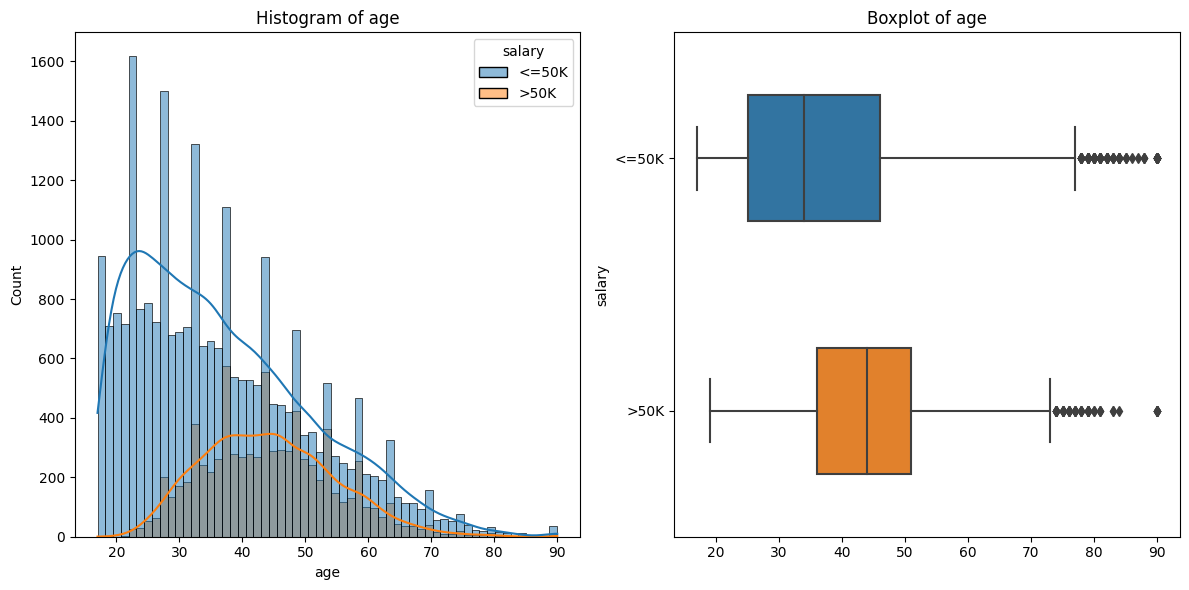

**************************************************


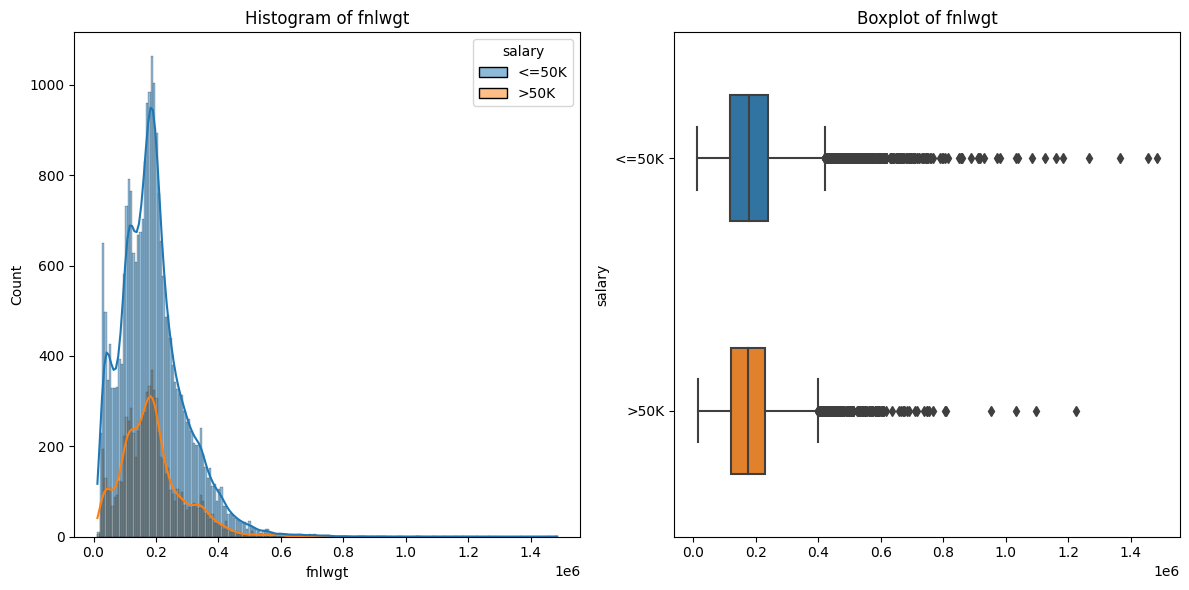

**************************************************


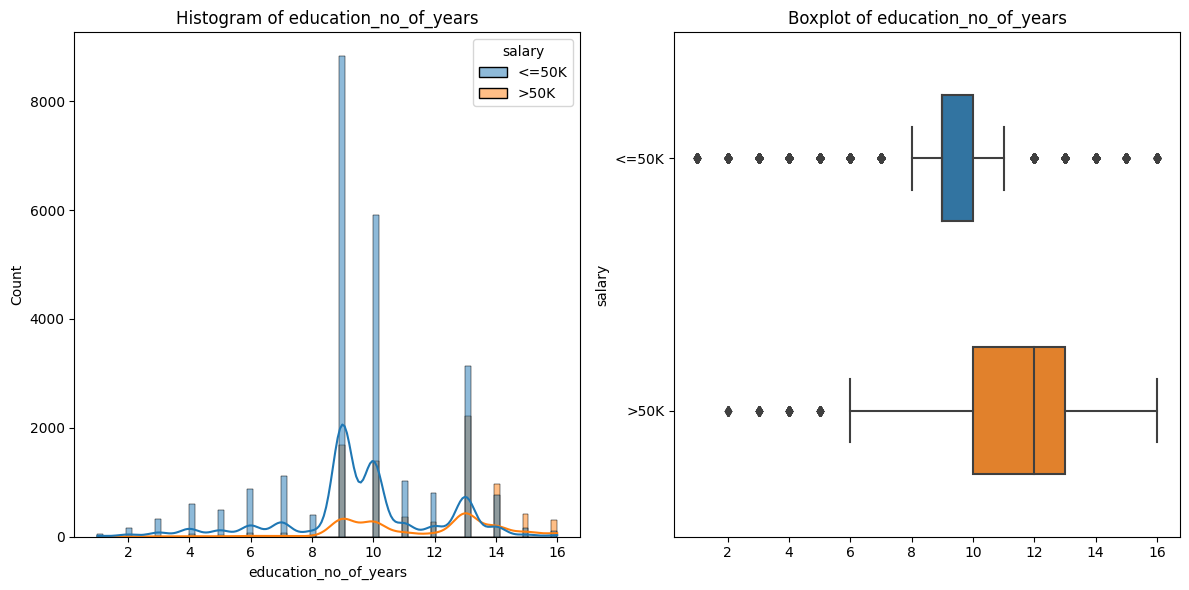

**************************************************


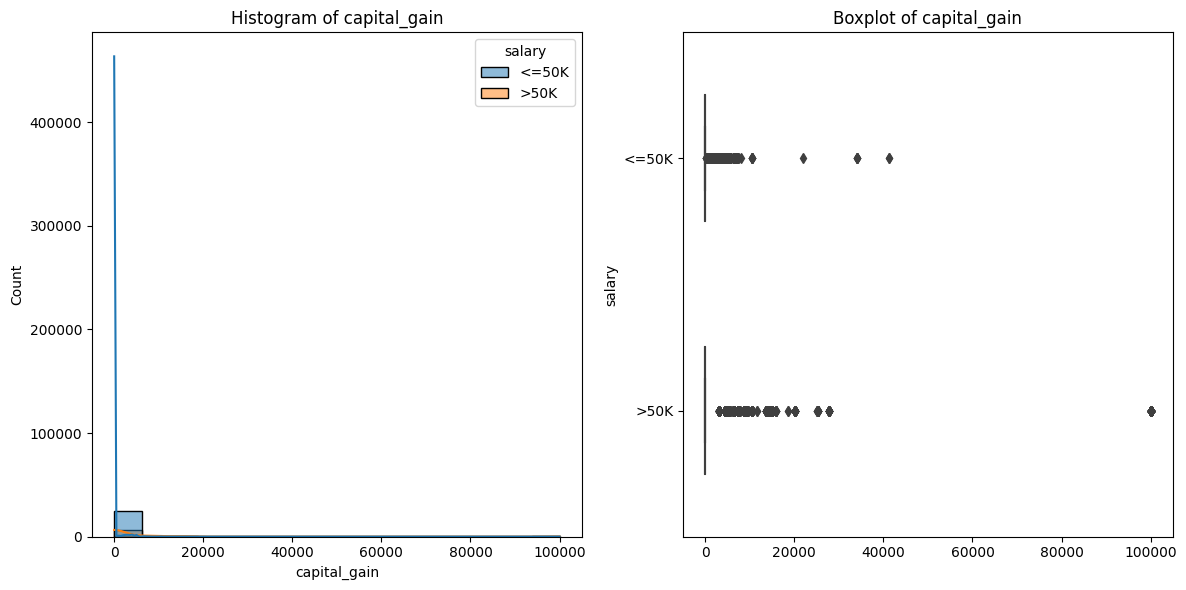

**************************************************


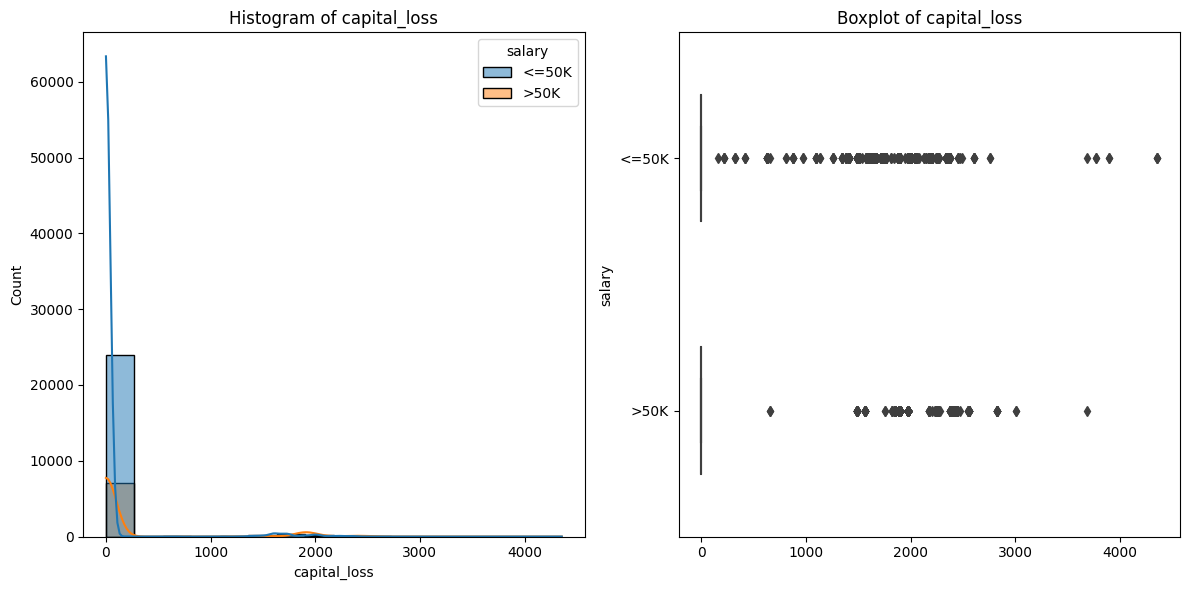

**************************************************


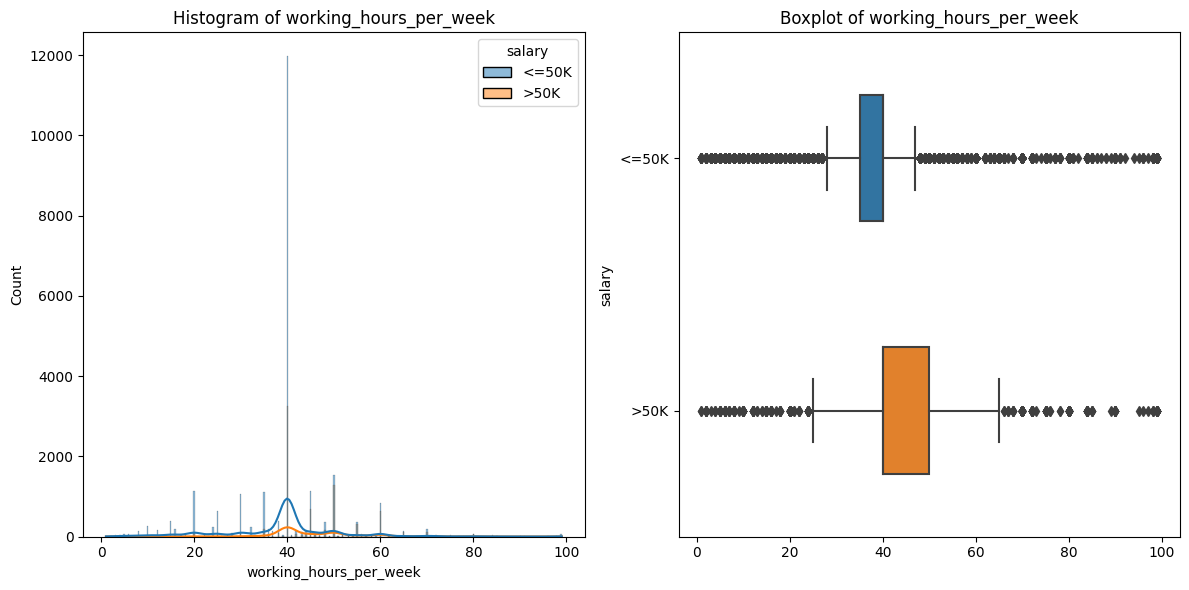

**************************************************


In [ ]:
#Continuous features bivariate analysis.

for i in num_vars:
  plot_histogram_boxplot(df, i, 'salary')
  print('*'*50)

OBSERVATIONS

The higher incomes tend to be held by people who are older with many more years of education than those who have a lower income. Higher income earners also unsuprisingly tend to work slightly more hours.

'Capital Gain' and 'Capital Loss' have virtually no correlation with the different classes and with all of the data points being outliers these two features will be dropped.

salary            <=50K  >50K    All
workclass                           
All               24720  7841  32561
Private           19378  5154  24532
Gov                3010  1341   4351
Self-emp-not-inc   1817   724   2541
Self-emp-inc        494   622   1116
Without-pay          21     0     21
**************************************************


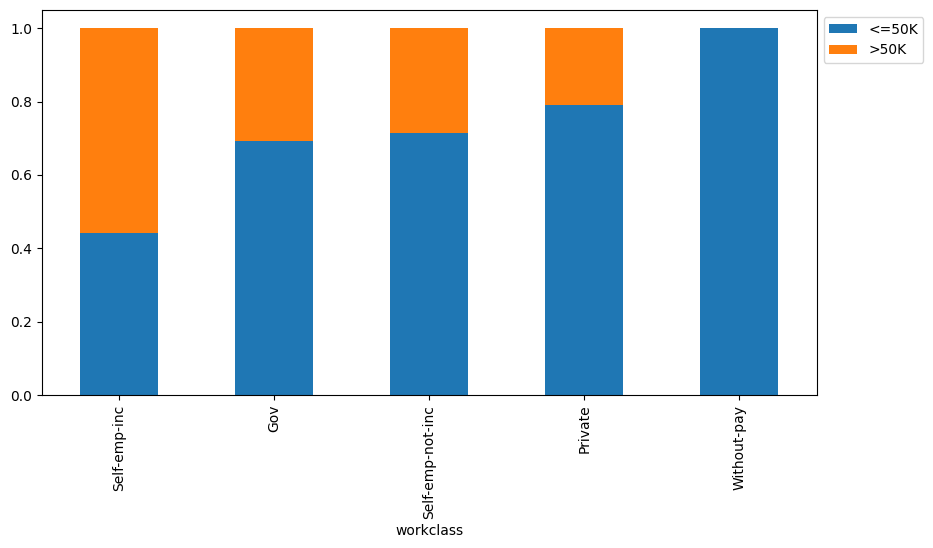

**************************************************
salary        <=50K  >50K    All
education                       
All           24720  7841  32561
Some-college   7880  2436  10316
Bachelors      3134  2221   5355
HS or less    12835  1919  14754
Masters+        871  1265   2136
**************************************************


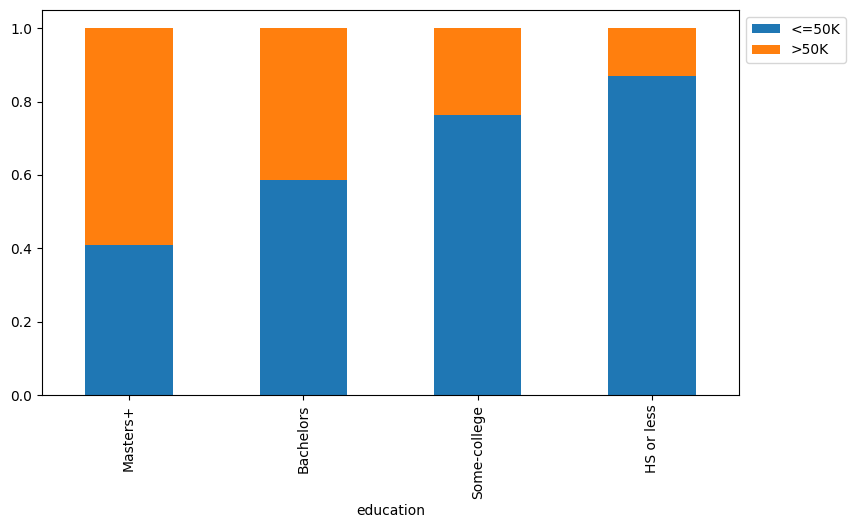

**************************************************
salary          <=50K  >50K    All
marital_status                    
All             24720  7841  32561
Married          8681  6736  15417
Never-married   10192   491  10683
Divorced         3980   463   4443
Separated        1867   151   2018
**************************************************


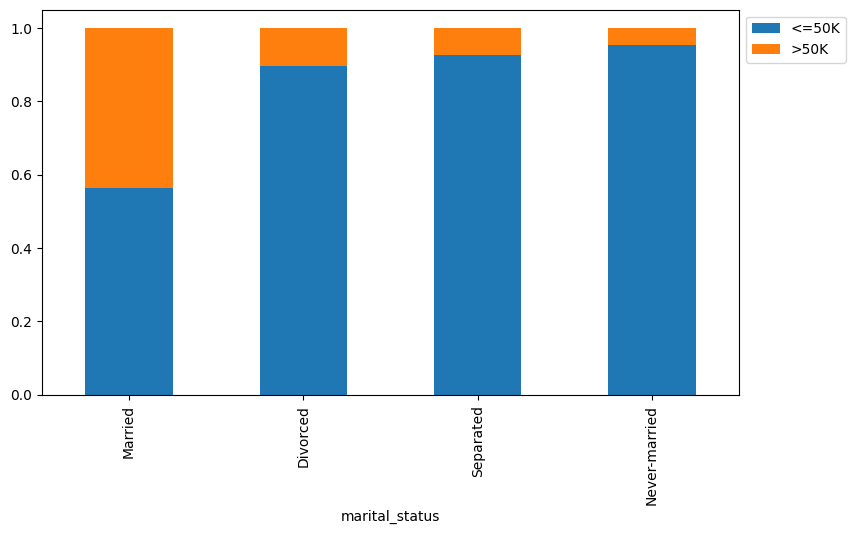

**************************************************
salary        <=50K  >50K    All
occupation                      
All           24720  7841  32561
White-collar  10954  5600  16554
Blue-collar    8362  1700  10062
Other          5404   541   5945
**************************************************


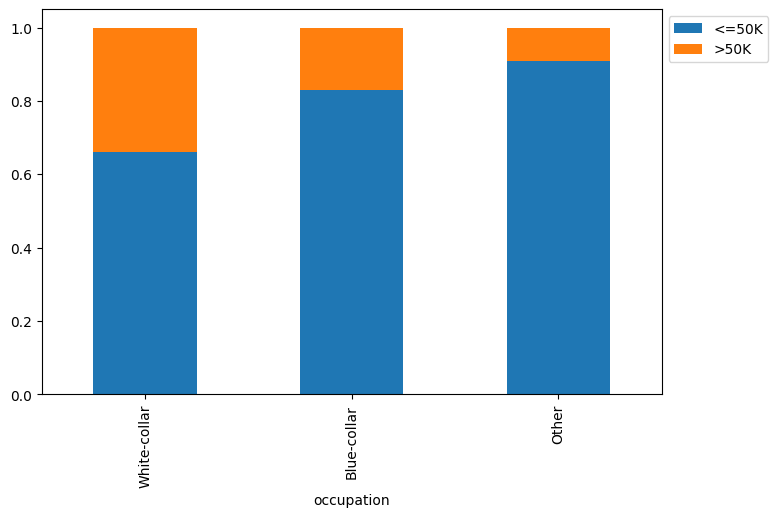

**************************************************
salary          <=50K  >50K    All
relationship                      
All             24720  7841  32561
Husband          7275  5918  13193
Not-in-family    7449   856   8305
Wife              823   745   1568
Unmarried        3228   218   3446
Own-child        5001    67   5068
Other-relative    944    37    981
**************************************************


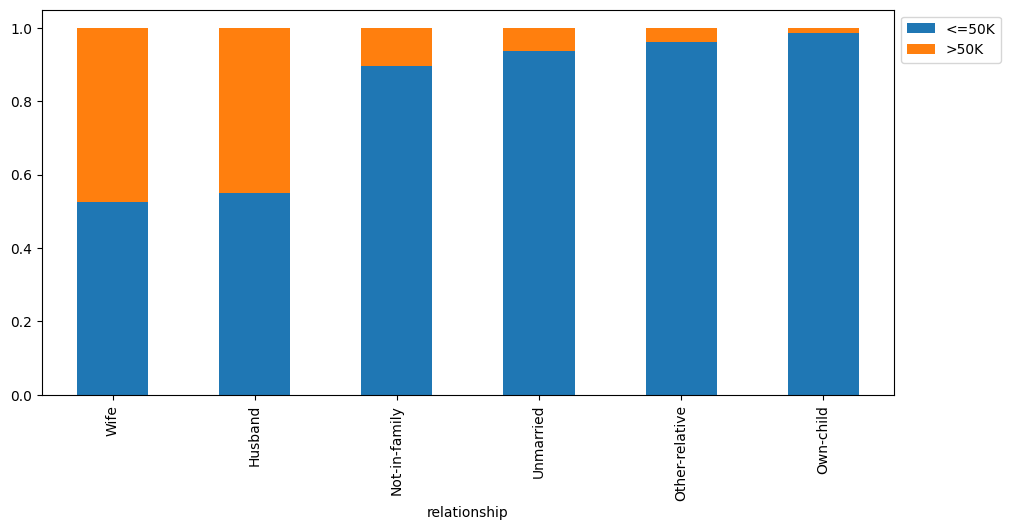

**************************************************
salary              <=50K  >50K    All
race                                  
All                 24720  7841  32561
White               20699  7117  27816
Black                2737   387   3124
Asian-Pac-Islander    763   276   1039
Amer-Indian-Eskimo    275    36    311
Other                 246    25    271
**************************************************


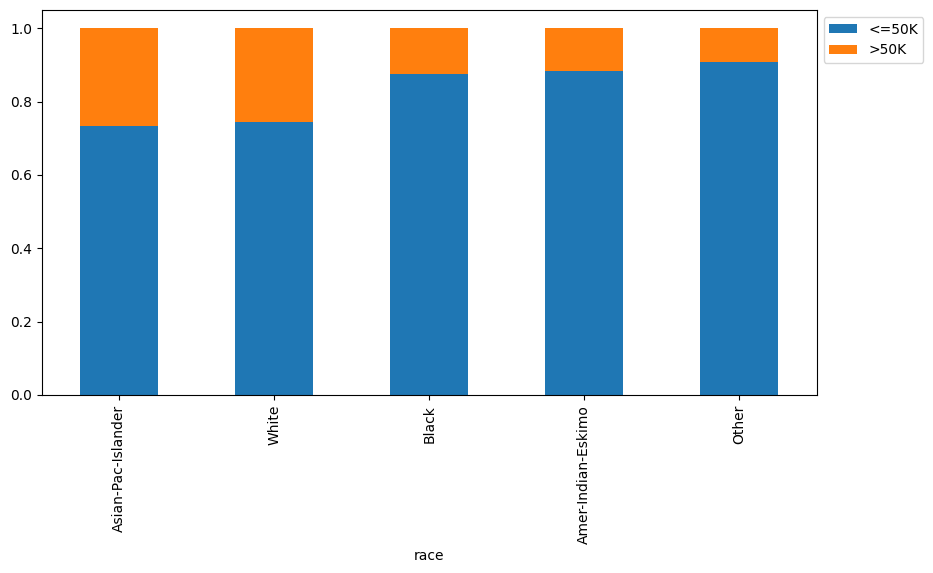

**************************************************
salary  <=50K  >50K    All
sex                       
All     24720  7841  32561
Male    15128  6662  21790
Female   9592  1179  10771
**************************************************


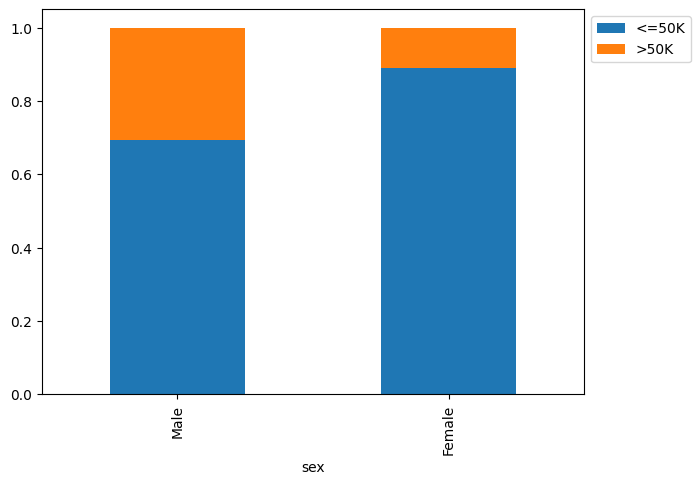

**************************************************
salary          <=50K  >50K    All
native_country                    
All             24720  7841  32561
North_America   23275  7313  30588
Asia              465   206    671
Other             501   162    663
Europe            369   152    521
South_America     110     8    118
**************************************************


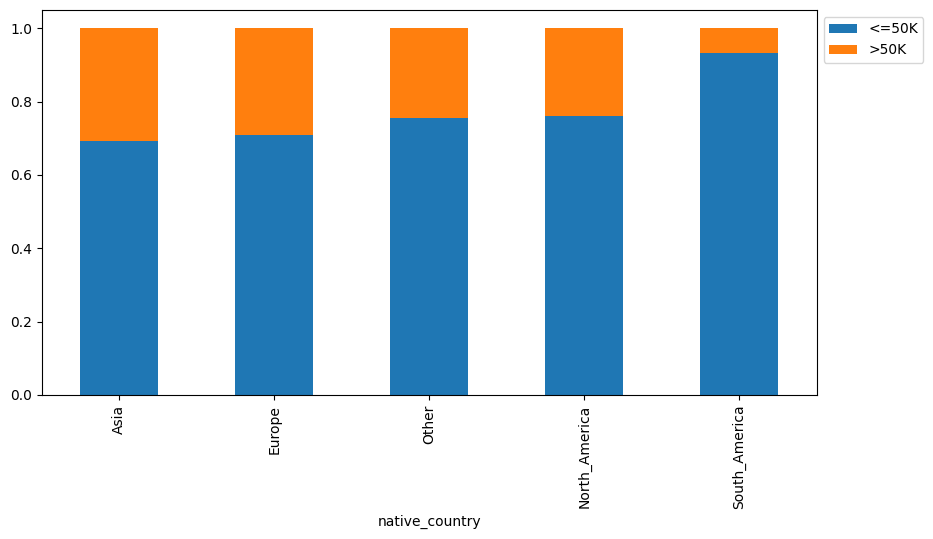

**************************************************
salary  <=50K  >50K    All
salary                    
>50K        0  7841   7841
All     24720  7841  32561
<=50K   24720     0  24720
**************************************************


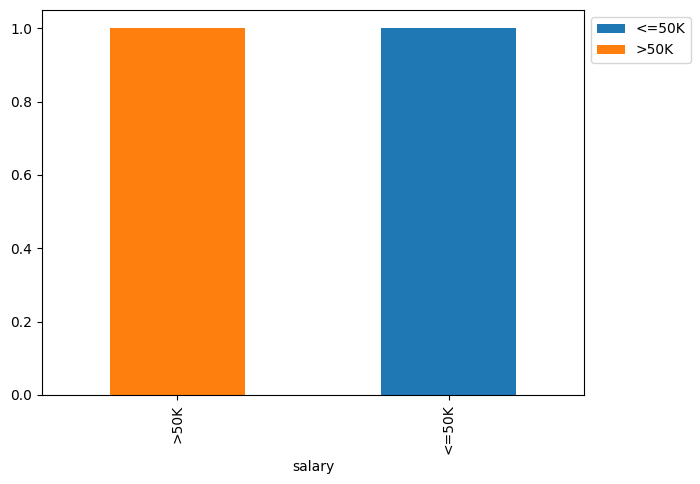

**************************************************


In [ ]:
#Categorical features bivariate analysis.

for i in obj_vars:
  bivariate_barplot(df, i, 'salary')
  print('*'*50)

OBSERVATIONS

Higher income individuals tend to work for themselves or if not that then government jobs. The years of education makes a big difference on their earning ability. Married individuals have a strong tendency to be higher earners versus their non-married counterparts. Lastly, the data shows that it is beneficial to be an asian or white male to be a higher earner.

In [ ]:
#Removing unnecessary continuous columns.

def remove_cols(df):
  '''Removes capital gain and loss columns as well as fnlwght.'''

  df = df.drop(['capital_gain', 'capital_loss', 'fnlwgt'], axis=1) #Removes columns from dataframe.
  return df  #Returns modified dataframe.

In [ ]:
#Applying column removing function.

df = remove_cols(df)
df.columns

Index(['age', 'workclass', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')

In [ ]:
#Squeazing in the outlier values.
#After analysis, these values did not reveal any hidden trends.

def outlier_fix(df):
  '''Imputes outlier values'''

  #'age'.
  df.loc[df['age'] > 75, 'age'] = 75

  #'education # of years'.
  df.loc[df['education_no_of_years'] < 6, 'education_no_of_years'] = 6

  #'working hours'
  df.loc[df['working_hours_per_week'] < 25, 'working_hours_per_week'] = 25
  df.loc[df['working_hours_per_week'] > 65, 'working_hours_per_week'] = 65

  return df #Return modified changes.

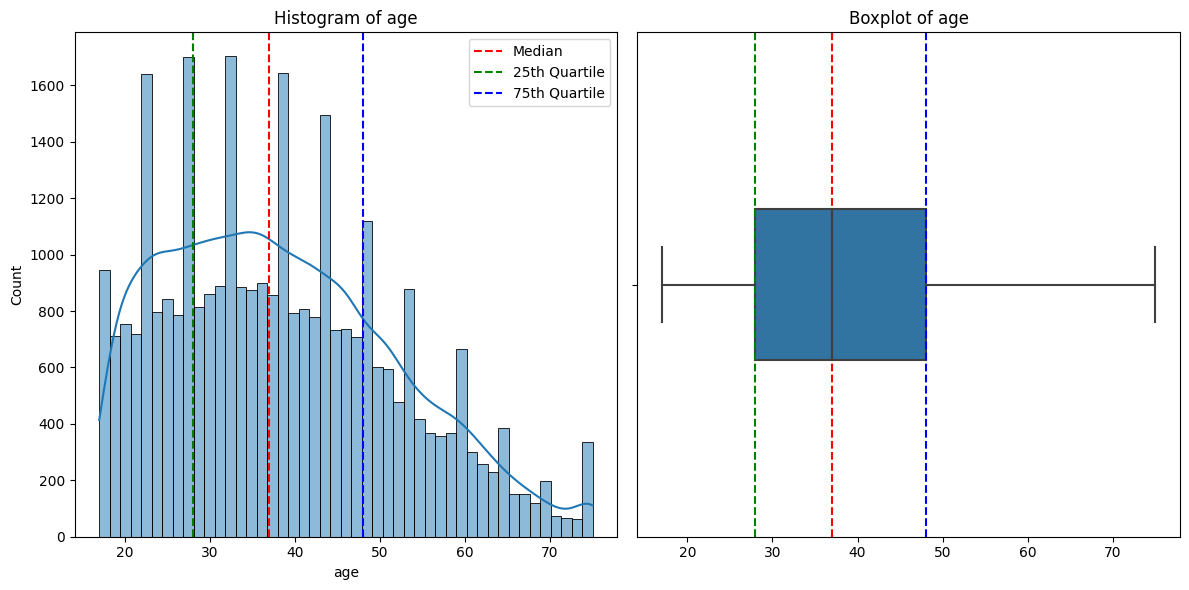

**************************************************


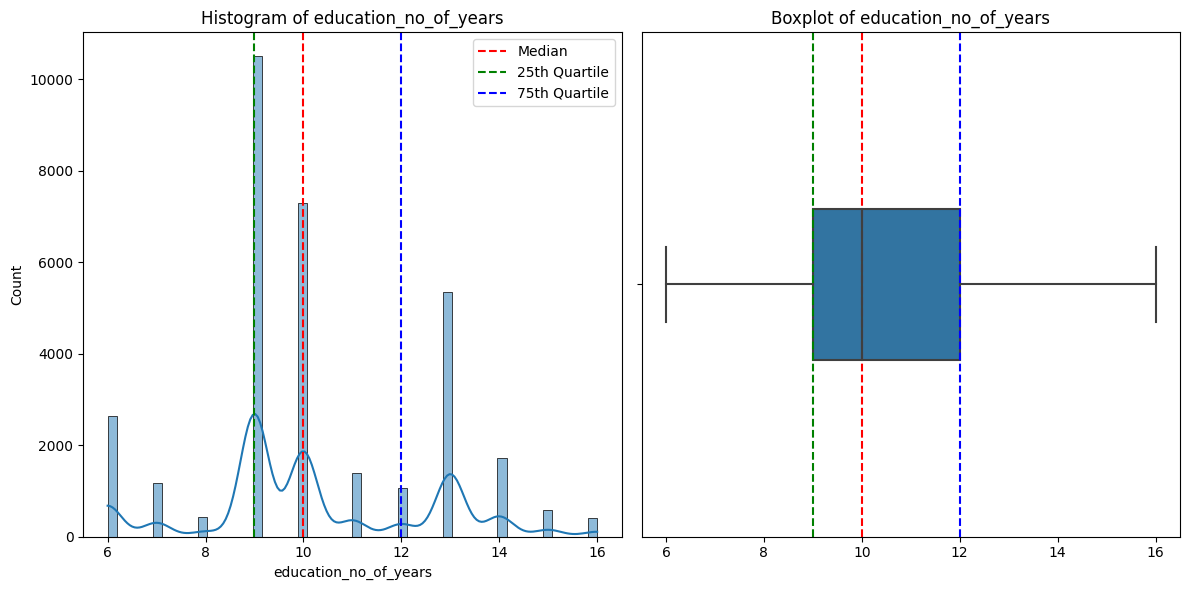

**************************************************


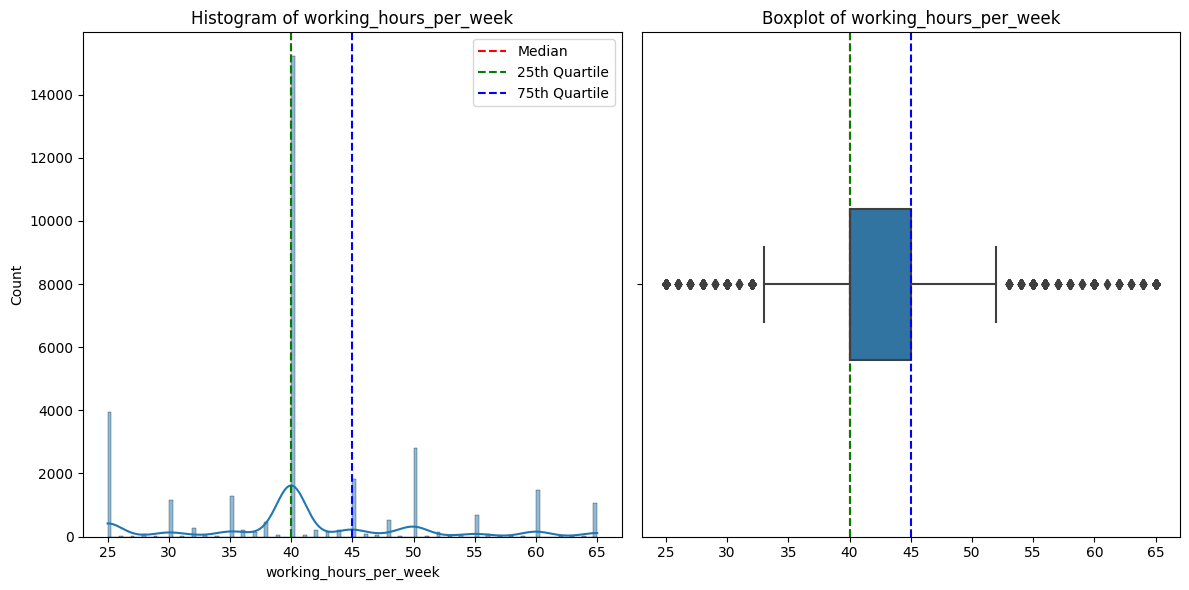

**************************************************


In [ ]:
#Applying and checking outlier fixes.

df = outlier_fix(df)
for i in df.select_dtypes(include='number').columns:
  plot_histogram_boxplot(df, i)
  print('*'*50)

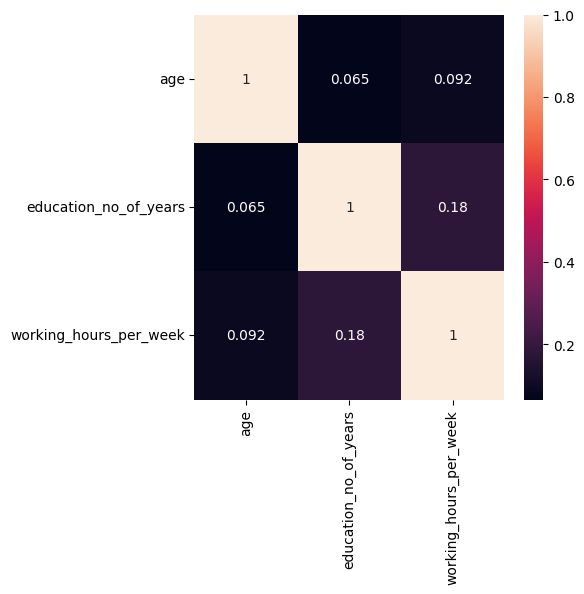

In [ ]:
#Heatmap to check for correlations.

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#Last step is to encode the target variable into 0 and 1.

def target_encoder(df):
  '''Encodes target variable into 0s and 1s'''

  replacements = {'<=50K': 0, '>50K': 1}

  df['salary'] = df['salary'].replace(replacements)
  return df

In [ ]:
#Applying target encoding.
df = target_encoder(df)
df['salary'].unique()

array([0, 1])

In [ ]:
print('*'*100)

****************************************************************************************************


MODEL TRAINING

In [ ]:
#Data separation and categorical variable encoding.
#Ideally, splitting the data is done before dataprocessing.
#Also, a validation split is used to better test data.
#For the sake of simplicity, both will not be done.

x = df.drop('salary', axis=1)
y = df['salary']

#Encoding categorical variables.
x = pd.get_dummies(x, drop_first=True)

#Spliting data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=r_state, stratify=y)

#Looking at resulting objects.
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print()
print(f"Distribution in y_train: \n{(y_train.value_counts(1)).round(2)}")
print()
print(f"Distribution in y_test: \n{(y_test.value_counts(1)).round(2)}")

x_train: (26048, 29)
x_test: (6513, 29)

Distribution in y_train: 
0    0.76
1    0.24
Name: salary, dtype: float64

Distribution in y_test: 
0    0.76
1    0.24
Name: salary, dtype: float64


Model evaluation decision: In this context, both identifying those who make less than 50K and those who make more than 50K is equally important. As such, we will use the general all around score of F1 to guage the models.

In [ ]:
#Starting with logistic regression model.

log_reg = LogisticRegression(random_state=r_state, solver='lbfgs')
log_model = log_reg.fit(x_train, y_train)

In [ ]:
def build_and_test_logistic_regression(model,x_train,y_train,x_test,y_test):
  '''Returns the training and testing results
  Those results are the f1_score and roc-auc
  score and curve.'''

  #F1 scores.
  y_pred_train = model.predict(x_train)
  train_f1_score = f1_score(y_train, y_pred_train)
  y_pred_test = model.predict(x_test)
  test_f1_score = f1_score(y_test, y_pred_test)

  #Function to display the ROC curves.
  def draw_roc(y_train_or_test, x_train_or_test):
    '''Draws the roc curve for either the train
    or the test data'''

    fpr, tpr, threshold = roc_curve(y_train_or_test, log_model.predict_proba(x_train_or_test)[:,1]) #false positive rate, true positive rate, threshold.
    roc_score = roc_auc_score(y_train_or_test, log_model.predict_proba(x_train_or_test)[:,1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


  #Putting it all together.
  print('TRAINING RESULTS')
  print(f"F1 score: {train_f1_score}")
  print()
  print(draw_roc(y_train,x_train))
  print("*"*100)
  print("TESTING RESULTS")
  print(f"F1 score: {test_f1_score}")
  print()
  print(draw_roc(y_test,x_test))

TRAINING RESULTS
F1 score: 0.6037836873103695



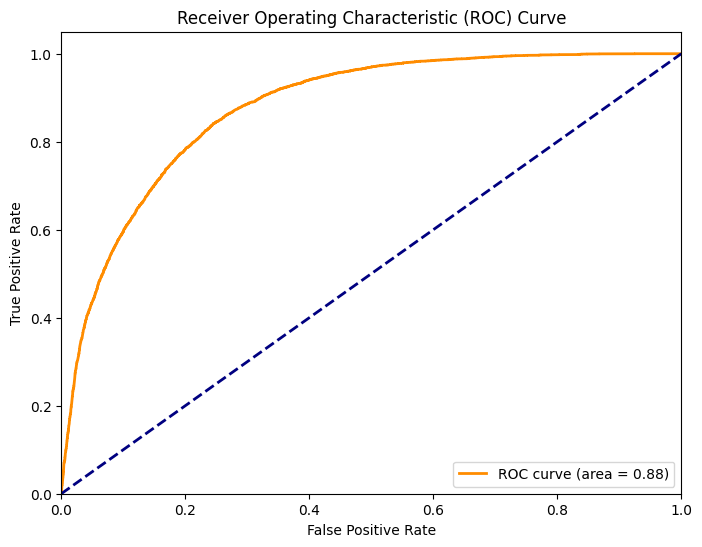

None
****************************************************************************************************
TESTING RESULTS
F1 score: 0.6114468538926413



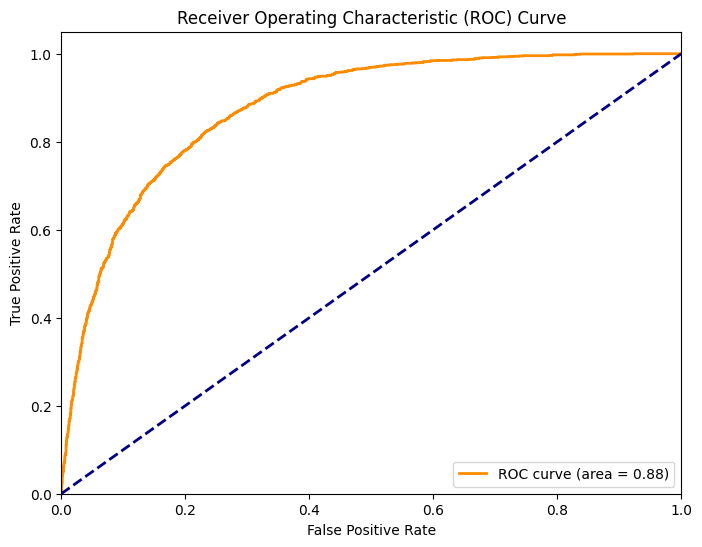

None


In [ ]:
build_and_test_logistic_regression(log_model,x_train,y_train,x_test,y_test)

Fairly poor but consisted results!

In [ ]:
#Threshold optimization.

fpr, tpr, thresholds = roc_curve(y_train, log_model.predict_proba(x_train)[:,1])

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Roc curve says the optimal threshold is: {optimal_threshold.round(5)}")

Roc curve says the optimal threshold is: 0.23089


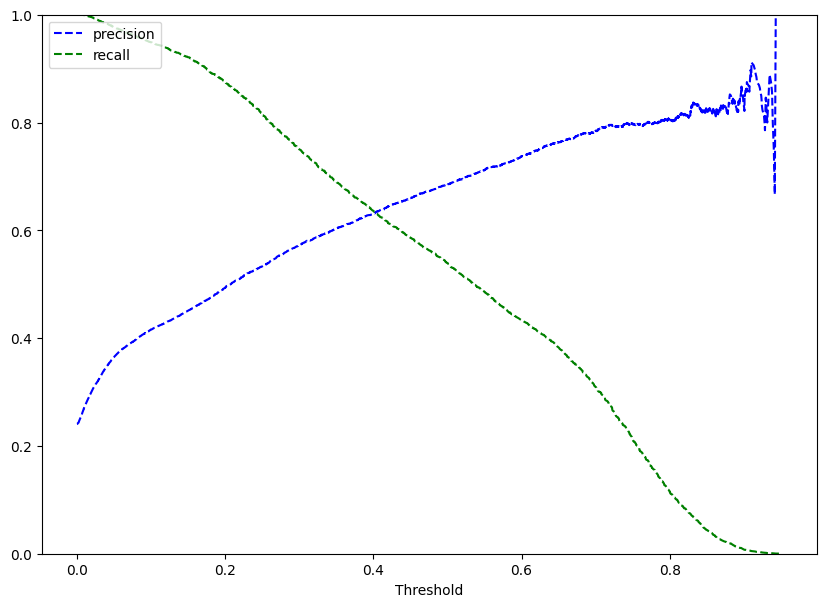

In [ ]:
y_scores = log_model.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Precision recall curve says optimal threshold is about 0.37

In [ ]:
#Applying ROC threshold.

predicted_probabilities_train = log_model.predict_proba(x_train)[:,1]
roc_train_score = f1_score(y_train, predicted_probabilities_train > optimal_threshold)
print(roc_train_score.round(5))
predicted_probabilities_test = log_model.predict_proba(x_test)[:,1]
roc_test_score = f1_score(y_test, predicted_probabilities_test > optimal_threshold)
print(roc_test_score.round(5))

0.64323
0.63816


improved performance

In [ ]:
#Applying prec-recall threshold.

predicted_probabilities_train = log_model.predict_proba(x_train)[:,1]
roc_train_score = f1_score(y_train, predicted_probabilities_train > 0.37)
print(roc_train_score.round(5))
predicted_probabilities_test = log_model.predict_proba(x_test)[:,1]
roc_test_score = f1_score(y_test, predicted_probabilities_test > 0.37)
print(roc_test_score.round(5))

0.63917
0.65291


Very close results. You can argue in favor of both. We'll chose 0.37.

In [ ]:
#Looking at coefficients.

log_odds = log_model.coef_[0]
pd.DataFrame(log_odds, x_train.columns, columns=["coef"]).T

,age,education_no_of_years,working_hours_per_week,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Without-pay,education_HS or less,education_Masters+,education_Some-college,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Europe,native_country_North_America,native_country_Other,native_country_South_America
coef,0.023763,0.125893,0.033416,-0.148191,0.318906,-0.469858,-0.116081,-1.014396,-0.228986,-0.614369,...,1.510528,-1.254032,-0.526874,-0.647028,-0.666621,0.934833,-0.464045,-0.392567,-1.204168,-0.481954


In [ ]:
# converting coefficients to odds
odds = np.exp(log_model.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(log_model.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index= x_train.columns).T

,age,education_no_of_years,working_hours_per_week,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Without-pay,education_HS or less,education_Masters+,education_Some-college,marital_status_Married,marital_status_Never-married,marital_status_Separated,occupation_Other,occupation_White-collar,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Europe,native_country_North_America,native_country_Other,native_country_South_America
Odds,1.024048,1.134160,1.033980,0.862266,1.375621,0.625091,0.890403,0.362621,0.795339,0.540982,1.504428,0.743453,0.757147,0.782518,1.964419,0.279727,0.264829,0.111248,0.236943,4.529119,0.285352,0.590448,0.523600,0.513440,2.546788,0.628735,0.675321,0.299942,0.617575
Change_odd%,2.404792,13.416037,3.398043,-13.773388,37.562133,-37.490910,-10.959693,-63.737873,-20.466071,-45.901761,50.442842,-25.654733,-24.285253,-21.748209,96.441873,-72.027303,-73.517108,-88.875219,-76.305703,352.911932,-71.464798,-40.955193,-47.640027,-48.655968,154.678750,-37.126464,-32.467898,-70.005849,-38.242462


The biggest factors contributing to individual being upper income: Married,Self-employed with income, White collar occupation, and Male, # years education.

Biggest factors contributing to individual being lower income: Every other category.